### Context for Mini-Project LR part 5

** Import modules and load data in preparation for Part 5.  **

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\saus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# load boston housing data
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
# view the data
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# from Part 3 checkup set V
# fit a model to 3 predictors
mCRP = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(mCRP.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 01 Dec 2017   Prob (F-statistic):           1.09e-97
Time:                        22:49:40   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

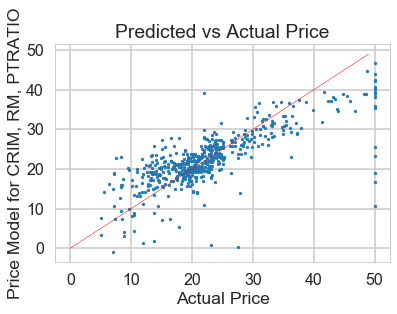

In [6]:
# now plot predicted vs. actual and x=y
plt.clf()
plt.scatter(x=bos.PRICE, y=mCRP.fittedvalues, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price' )
plt.ylabel('Price Model for CRIM, RM, PTRATIO')
plt.show()

## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important to investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p style="color:black;"><b>Answer:  If the assumptions were met, I would expect the residuals plot to be relatively uniform looking (i.e. no particular pattern or clustering).  It looks to me like there are more positive residuals and there is a group (also apparent in the model vs. actual plot) up against the 'right wall' on the positive side.  I believe these points are outliers in the data.

I would guess that the residuals are nearly normally distributed (if you ignore outliers).  I think the next plot may shed some light on this. </b></p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>
<p style="color:black;"><b>Answer:  This kind of plot shows the difference between two distributions.  If the distribution of residuals is in fact normal, that the plot would lie very close the the line y=x.  This line is quite close to y=x, supporting the notion that the distribution of residuals is near normal. </b> </p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>
<p style="color:black;"><b>Answer: Quantile plots are new to me; thus I'm not able to interpret them with confidence.  The residual plot can be assessed by visual intuition.  References suggest that the quantile plot is more accurate, but I would need to experiment to get a feel for how to use them.</b></p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>
<p style="color:black;"><b>Answer: It looks like the set of points floating at the top of the price range are outliers.  I believe that the data gatherers may have capped price at 50k.  Also, it seems very likely that other factors not included in the variables that have significant positive influence on the value of property.  
</b></p>
<p style="color:black;"><b>Also there is a smaller group (including 1 negative prediction) with very low predictions.  These points may well represent another class of properties not well described by the variables.
</b></p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>
<p style="color:black;"><b>Answer: High-leverage points are those observations, if any, made at extreme or outlying values of the independent variables such that the lack of neighboring observations means that the fitted regression model will pass close to that particular observation.  Many of the points with high residuals are outliers already identified.  There are 3 points with relatively high leverage, but their residuals are relatively low.
</b></p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
<p style="color:black;"><b>Answer: Removing the outliers results in a substantial improvement in the $R^2$ from 0.593 to 0.683.  Removing the 3 highest leverage points results in no further improvement.  This is explained by the fact that these points, though high leverage, have relatively small residuals.  Points on the leverage plot that have both high leverage and high residual have significant influence on the model.
</b></p>

</div>

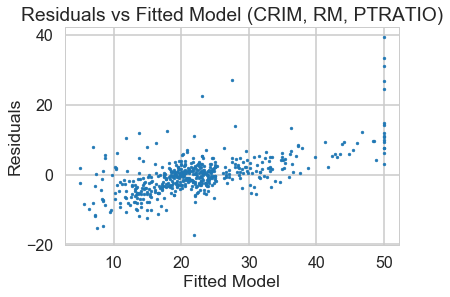

In [7]:
# Construct a fitted values versus residuals plot. What does the plot tell you? 
# Are there any violations of the model assumptions?
# 
plt.scatter(x=bos.PRICE, y=mCRP.resid, s=8)
plt.title('Residuals vs Fitted Model (CRIM, RM, PTRATIO)')
plt.xlabel('Fitted Model' )
plt.ylabel('Residuals')

plt.show()

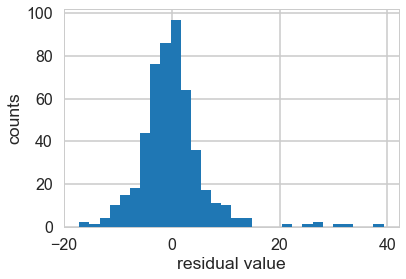

In [8]:
# strictly for my edification, I want to see a histogram of the residuals
# this is interesting because it shows the highest frequency near the 0
# residual value.  You again see a group way out on the right (possible outliers).
# if those are ignored, we have what looks to be a nearly normal distribution
# with a bumpy tail on the right.
plt.hist(mCRP.resid, bins=30)
plt.ylabel('counts')
plt.xlabel('residual value')

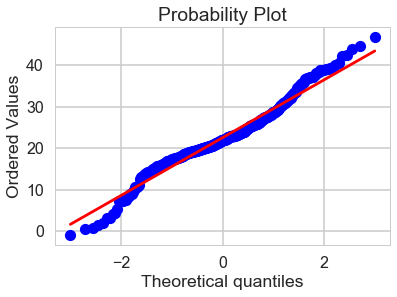

In [9]:
# quantile plot
stats.probplot(mCRP.fittedvalues, plot=plt, dist="norm")
plt.show()

In [10]:
# outliers
# first let's find predictions less than 3
out_low_prediction = mCRP.fittedvalues.loc[mCRP.fittedvalues < 3]; out_low_prediction

365    0.359783
367    0.776834
374    1.801067
406    1.352787
414   -0.893622
dtype: float64

In [11]:
# outliers
# next let's find PRICE = 50
out_high_price = bos.loc[bos.PRICE == 50]; out_high_price

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


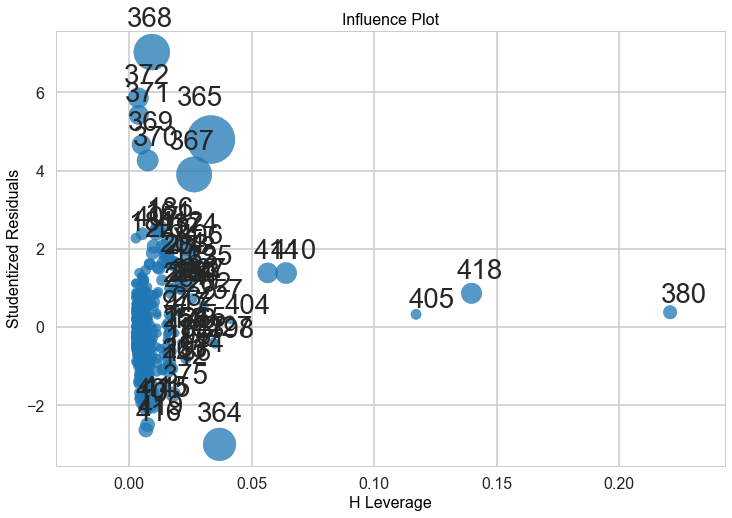

In [12]:
#  Construct a leverage plot and identify high leverage points in the model.
#  This call is straight out of http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(mCRP, ax=ax, criterion="cooks")
plt.show()

In [13]:
# first show outliers
bos.loc[out_low_prediction.index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
374,18.49820,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
406,20.71620,0.0,18.1,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9
414,45.74610,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


In [14]:
print(bos.shape)
bos_no_out = bos.drop(out_low_prediction.index)
bos_no_out.shape

(506, 14)


(501, 14)

In [15]:
bos_no_out = bos_no_out.loc[bos_no_out.PRICE != 50]
bos_no_out.shape

(485, 14)

In [16]:
### Okay, now I've gotten rid of outliers.  Remodel and plot.
mnoCRP = ols('PRICE ~ CRIM + RM + PTRATIO', bos_no_out).fit()
print(mnoCRP.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     345.9
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          1.21e-119
Time:                        22:49:42   Log-Likelihood:                -1408.4
No. Observations:                 485   AIC:                             2825.
Df Residuals:                     481   BIC:                             2842.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8390      3.202     -1.824      0.0

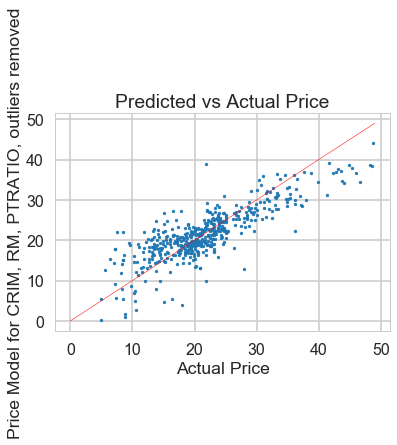

In [17]:
# now plot predicted vs. actual and x=y
plt.clf()
plt.scatter(x=bos_no_out.PRICE, y=mnoCRP.fittedvalues, s=8)
x = np.arange(50); y = x.copy()
plt.plot(x, y, color='red', linewidth=0.5)
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price' )
plt.ylabel('Price Model for CRIM, RM, PTRATIO, outliers removed')
plt.show()

In [18]:
# what is there about this point that makes it high leverage?  Oh, it's the max instance of CRIM.
bos.loc[380, :]

CRIM        88.9762
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6710
RM           6.9680
AGE         91.9000
DIS          1.4165
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       17.2100
PRICE       10.4000
Name: 380, dtype: float64

In [19]:
bos_no_out_no_lev = bos_no_out.drop([380, 405, 418])

In [20]:
### Okay, now I've gotten rid of outliers.  Remodel and plot.
mnolCRP = ols('PRICE ~ CRIM + RM + PTRATIO', bos_no_out_no_lev).fit()
print(mnoCRP.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     345.9
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          1.21e-119
Time:                        22:49:42   Log-Likelihood:                -1408.4
No. Observations:                 485   AIC:                             2825.
Df Residuals:                     481   BIC:                             2842.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8390      3.202     -1.824      0.0